# Likert-Clusters v1.0
## A notebook for cluster analysis and visualization of survey data in likert scale

The assumption this notebook makes is that if you get a bunch of answers then most of your participants tend to respond in ways that fall into several similar groupings (clusters), and this alone tells you something about the target population's conceptions regarding your questions.

There are a number of methods designed for visualizing likert data (e.g. item response theory, categorical data analyses, multidimensional nonlinear descriptive analysis, fuzzy probability & statistics, and dissimilarity/similarity analyses which require strong knowledge in statistics. Luckily, by using fairly simple distance measures and cluster algorithms you can compare individual responses for each participant to better understand whether their answers are all over the place or tend to fall into groups (the latter is the preferred result). 

This notebook uses to apply K-means algorithm for likert data (questionaries with answers betwen 1 to 5) and then visualize the emerging clusters in various ways. Note: at the moment this notebook only divides the data to two clusters.

### Using this notebook

The input data should be a csv-style file, e.g: 

| id | question1 | question2 | question3 | question4 |
|----|-----------|-----------|-----------|-----------|
| 1  | 1         | 2         | 3         | 4         |
| 2  | 5         | 5         | 5         | 5         |
| 3  | 2         | 3         | 1         | 3         |

Header and left-most ids can be arbitrary and do not show in plots but they are expected to be included in data. Data cells should have values between 1-5. 

To use this notebook:
1. Insert data file into suitable location (e.g. the directory of the notebook).
2. Set below the filename, file_delimiter.
3. Set below the questions and their answer options at the far ends (answers 1 and 5) for purposes of showing them in plots at answers section.
4. Run each cell.

In [183]:
# the data file
filename = "Testdata1.txt"
file_delimiter = "\t"

# the questions
questions = ['Question 1', 'Question 2', 'Question 3', 'Question 4', 'Question 5']

# the far end answer options
answer_options = [('I strongly agree', 'I strongly disagree'),
    ('I strongly agree', 'I strongly disagree'),
    ('I strongly agree', 'I strongly disagree'),
    ('I strongly agree', 'I strongly disagree'),
    ('I strongly agree', 'I strongly disagree')]


In [184]:
# for reading the data from file

import numpy as np
import pandas as pd

# read data and treat missing values
df = pd.read_csv(filename, delimiter=file_delimiter, decimal=",", encoding="utf-8")

# prepare data as numpy arrays, assume that first column has some sort of row id
data = np.array(df.values[:,1:], dtype=int)

# prepare row and col counts for easy use
rows, cols = data.shape

#print(data)
print("Data has", rows, "samples with", cols, "features.")

Data has 29 samples with 5 features.


## Clustering

K-Means clustering is used to separate the data into two clusters. 

The algorithm produces two "cluster centers" in the data space, e.g.:

Cluster A: "2 3 2 2 2 3 3 3 2 3 2 4 3"

Cluster B: "4 4 3 2 3 2 4 4 4 4 4 4 2"

Also, it labels each sample into either cluster A or B (internally stored as either 0 or 1), e.g:

Labels: "A B A A A B B B B A B A"

In [185]:
from sklearn.cluster import KMeans

#from sklearn.cluster import AgglomerativeClustering
#ac = AgglomerativeClustering(n_clusters=2).fit(data)

k = KMeans(n_clusters=2).fit(data)

# index of the cluster each sample belongs to
labels = k.labels_
cluster_centers = np.round(k.cluster_centers_).astype(int)

print("For", len(data), "samples")
print()
print(cluster_centers, " are the cluster centers, and")
print()
print(labels, " are the labels for each sample.")

For 29 samples

[[2 4 3 3 2]
 [5 1 2 2 4]]  are the cluster centers, and

[0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1]  are the labels for each sample.


## Visualizing the answers

In [188]:
# set ylim for the maximum value to show in plots, adjust until it looks visually pleasing
YLIM = 15
# also set the figsize below

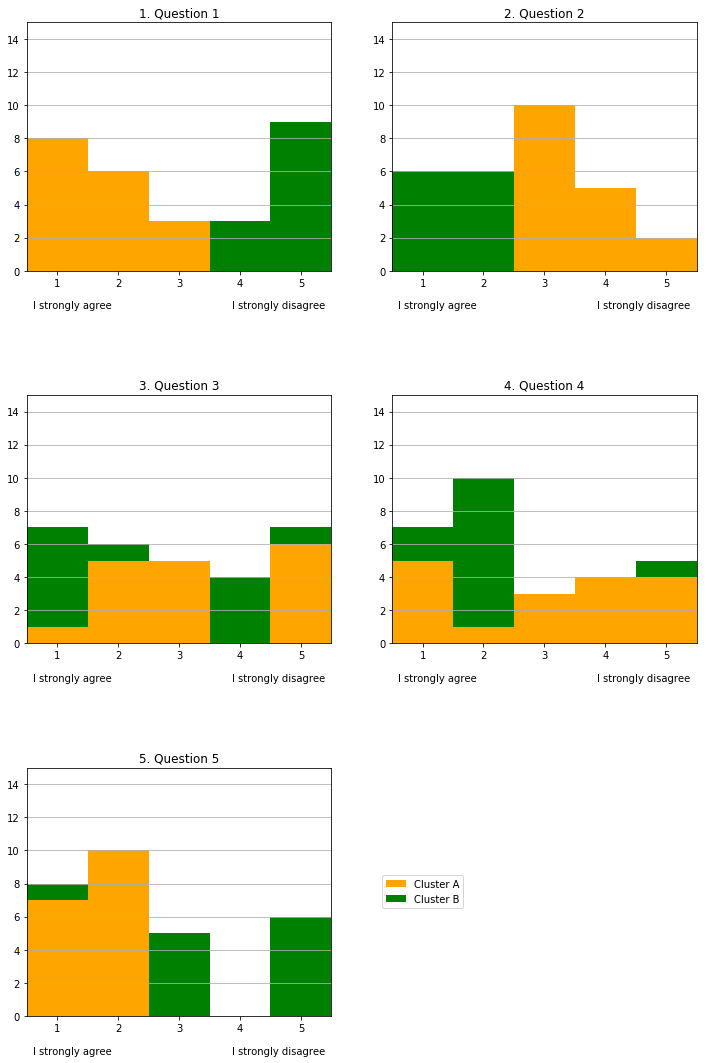

In [189]:
import matplotlib.pyplot as plt
from math import ceil
from textwrap import wrap

plt.close()

width = 2
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=.5, top=1.85)

counter = 1
for i in range(0, cols):
    ax = fig.add_subplot(ceil(cols/width), width, i+1)
    #ax.set_yticks([0,4,8,12])
    ind = np.arange(1,6)
    ax.set_xticks(ind + 0.5)
    ax.set_xticklabels(ind)
    
    axes = plt.gca()
    axes.set_ylim([0,YLIM])
    axes.set_xlim([1,6])

    title = "\n".join(wrap("{}. {}".format(counter, questions[i]), 42))
    plt.title(title)
    counter += 1
    #plt.grid(True)
    ax.yaxis.grid() 

    histdata = [data[labels == 0,i], data[labels == 1,i]]
    patches = plt.hist(histdata, color=['orange', 'green'], bins=[1,2,3,4,5,6], stacked=True, histtype='bar', 
        label=['Cluster A', 'Cluster B'])

    answerA, answerB = answer_options[i]
    answerA = "\n".join(wrap(answerA, 26))
    answerB = "\n".join(wrap(answerB, 26))
    
    ax.text(0.02, -0.12, answerA,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, fontsize=10)
    ax.text(0.98, -0.12, answerB,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes, fontsize=10)

plt.legend(bbox_to_anchor=(1.3, 0.5), loc='center')

#plt.tight_layout()
#plt.savefig('survey1.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

## Parallel coordinates

Parallel coordinates is another great way to visualize the data.

Samples are shown with dotted lines and cluster centers with normal lines.

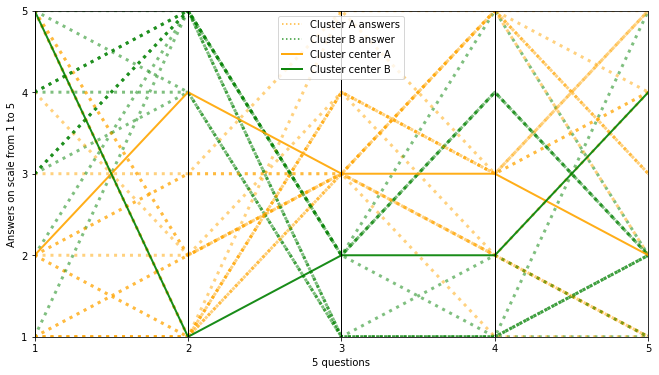

In [190]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import matplotlib.lines as mlines

plt.close()

plt.figure(figsize=(11,6))

# create sample plots
df = df.assign(Group=labels)
axes = parallel_coordinates(df, 'Group',
    alpha=0.5, linewidth=3.0, linestyle=':', color=('orange', 'green'))

# create cluster center plots
df_cc = pandas.DataFrame(cluster_centers)
centers = np.array([0,1], dtype=int)
df_cc = df_cc.assign(Clusters=centers)
axes = parallel_coordinates(df_cc, 'Clusters', 
    alpha=0.9, linewidth=2.0, color=('orange', 'green'))

# create legend
c1 = mlines.Line2D([], [], color='orange', linestyle=':', alpha=0.8, label='Cluster A answers')
c2 = mlines.Line2D([], [], color='green', linestyle=':', alpha=0.8, label='Cluster B answer')
c3 = mlines.Line2D([], [], color='orange', linewidth=2.0, alpha=0.95, label='Cluster center A')
c4 = mlines.Line2D([], [], color='green', linewidth=2.0, alpha=0.95, label='Cluster center B')
plt.legend(handles=[c1,c2,c3,c4], fontsize=10)

# create everything else
#plt.title('Parallel coordinates for questions and answers')
plt.xlabel("{} questions".format(cols))
plt.ylabel('Answers on scale from 1 to 5')

axes.set_ylim([1,5])
plt.yticks([1,2,3,4,5])
col_names = [str(i) for i in range(1,cols+1)]
plt.xticks(range(0,len(col_names)), col_names)

# show it
plt.show()


## Visualizing with PCA, MDS and t-SNE

Three methods are used here to reduce the dimensions to 2D for visualizing. Unfortunately reducing dimensions to two always loses some data. 

Each method tries to preserve some aspect: PCA preserves variance, MDS preserves distances and t-SNE preserves topology.

In [191]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

# apply PCA
pca = PCA(n_components=2)
Xpca = pca.fit_transform(data)

# apply MDS
mds = MDS(n_components=2)
Xmds = mds.fit_transform(data)

# apply t-SNE
tsne = TSNE(n_components=2, perplexity=5.0)
Xtsne = tsne.fit_transform(data)

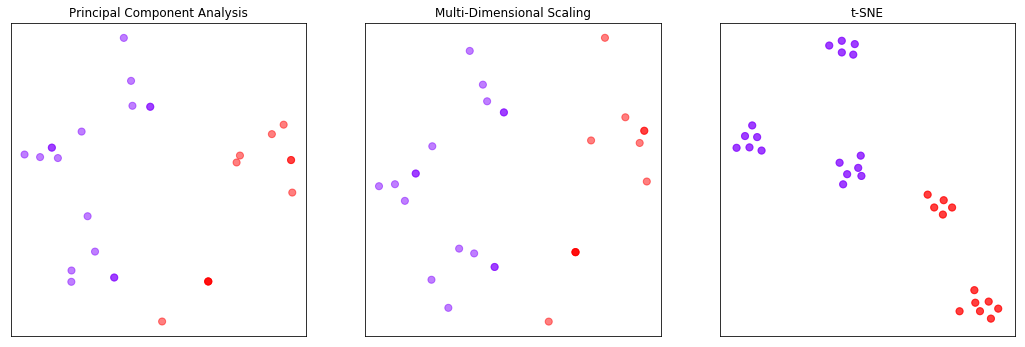

In [192]:
import matplotlib as mpl

# plot all three methods

plt.close()

fig = plt.figure(1, figsize=(18,6))
#fig.suptitle("Cluster visualization", fontsize=12)
fig.subplots_adjust(top=0.85)

ax = plt.subplot(1,3,1)
ax.set_xticks([])
ax.set_yticks([])

plt.scatter(Xpca[:,0], Xpca[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('rainbow'))
plt.title("Principal Component Analysis")

ax = plt.subplot(1,3,2)
ax.set_xticks([])
ax.set_yticks([])

plt.title("Multi-Dimensional Scaling")
plt.scatter(Xmds[:,0], Xmds[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('rainbow'))

ax = plt.subplot(1,3,3)
ax.set_xticks([])
ax.set_yticks([])

plt.title("t-SNE")
plt.scatter(Xtsne[:,0], Xtsne[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('rainbow'))
plt.scatter(Xtsne[:,0], Xtsne[:,1], s=50, alpha=0.5, c=labels, cmap=plt.cm.get_cmap('rainbow'))

plt.show()


## Results

This sections can be used to view the cluster of individual samples and distances.

Note that Group 0 is cluster A and group 1 is cluster B.

In [193]:

def manhattan_distance(answer1, answer2, answerDifference=4):
    # function to count manhattan distance of likert answers
    maxDistance = np.array([answerDifference]) * len(answer1)
    
    result = [abs(value1-value2) for i, (value1, value2) in enumerate(zip(answer1,answer2))]
    
    return (maxDistance - np.sum(result)) / maxDistance

distances = np.zeros([2, len(data)])

for i, answer in enumerate(data):
    for j, center in enumerate(cluster_centers):
        distances[j,i] = manhattan_distance(answer, center)

df = df.assign(ClusterA_distance=distances[0])
df = df.assign(ClusterB_distance=distances[1])

print(df[['Group','ClusterA_distance','ClusterB_distance']])


    Group  ClusterA_distance  ClusterB_distance
0       0               0.85               0.35
1       0               0.80               0.50
2       1               0.60               0.80
3       1               0.45               0.85
4       0               0.80               0.60
5       0               0.85               0.45
6       0               0.75               0.35
7       1               0.55               0.85
8       1               0.40               0.70
9       0               0.80               0.60
10      0               0.85               0.35
11      0               0.75               0.35
12      1               0.55               0.65
13      1               0.40               0.90
14      0               0.75               0.55
15      0               0.75               0.25
16      0               0.75               0.45
17      1               0.60               0.80
18      1               0.40               0.80
19      0               0.65            

## Bonus: Hierarchical clustering

Hierarchical clustering visualizes clusters the data very well and can be used to double-check the results.

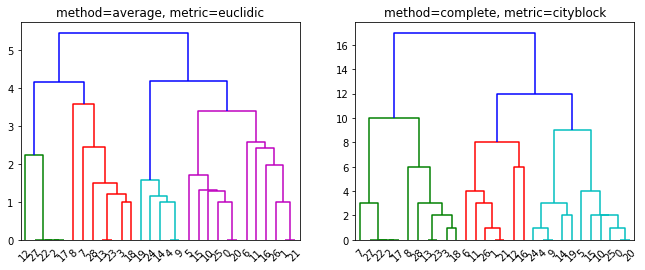

In [194]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Z1 = linkage(data, method='average', metric='euclidean')
Z2 = linkage(data, method='complete', metric='cityblock')

fig = plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
dendrogram(Z1)
plt.title("method=average, metric=euclidic")

plt.subplot(1,2,2)
dendrogram(Z2)
plt.title("method=complete, metric=cityblock")

plt.show()